# Example

In [1]:
# import libraries
import gym
import gym_trading

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

In [2]:
# creating environment
env = gym.make('trading-v0', n_samples=200, sampling_every=16, random_initial_date=True, stack_size=20, fee=0.25)

print('Number of actions:', env.action_space.n)

Number of actions: 2


In [3]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')

Observation: [11606.75 11618.4  12006.5  12015.3  11917.55 12110.5  12037.3  11840.95
 11182.8  11397.75 10794.9  10946.4  10978.2  11002.4  10521.05 10240.
 10614.95 10229.3   9760.   10163.8 ] (type: <class 'numpy.ndarray'>)


In [4]:
rewards = []
# simulating a trading session
done = False
counter = 0
while not done:

    # random action [BUY, SELL]
    action = np.random.randint(50)  # actions admitted are 0 and 1 only.
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} -'
              f'Reward (AAV): {reward} -'
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 -Reward (AAV): 0.5108256237659907 -Done: False - Price: [11618.4  12006.5  12015.3  11917.55 12110.5  12037.3  11840.95 11182.8
 11397.75 10794.9  10946.4  10978.2  11002.4  10521.05 10240.   10614.95
 10229.3   9760.   10163.8   9897.9 ] (type: <class 'numpy.ndarray'>)
Total profit: 20.51 %


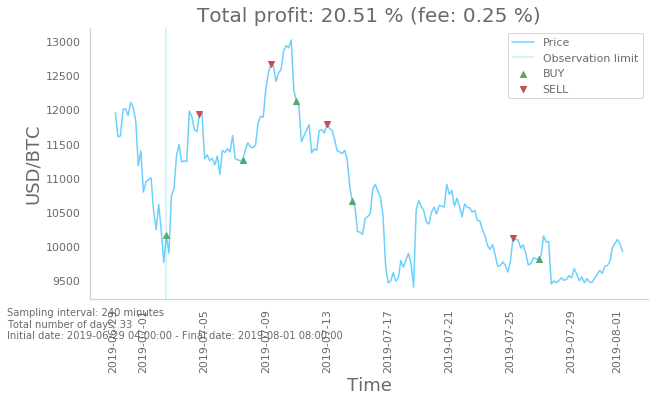

In [5]:
env.render()

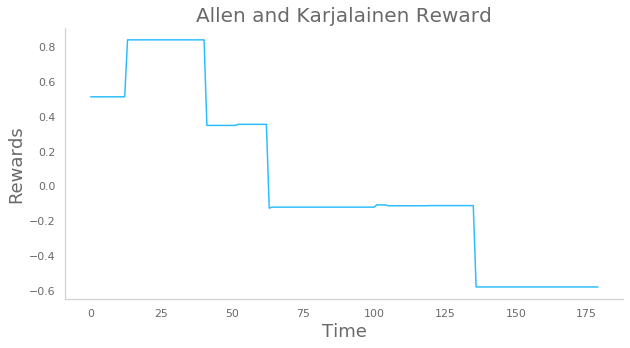

In [6]:
plt.plot(rewards)
plt.title('Allen and Karjalainen Reward')
plt.xlabel('Time')
plt.ylabel('Rewards')
plt.show()